In [0]:
%fs ls /FileStore/tables/500_Cities.csv

path,name,size,modificationTime
dbfs:/FileStore/tables/500_Cities.csv,500_Cities.csv,230459075,1655921351000


In [0]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

cities_health = "/FileStore/tables/500_Cities.csv"

In [0]:
%fs head /FileStore/tables/500_Cities.csv

[Truncated to first 65536 bytes]
Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,Geolocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
2015,IN,Indiana,Fishers,City,BRFSS,Health Outcomes,1823278,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,24.2,23.7,24.7,,,76794,POINT (-85.969310702 39.9587635263),HLTHOUT,BPHIGH,1823278,,High Blood Pressure
2015,CA,California,Milpitas,City,BRFSS,Health Outcomes,647766,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,22.2,21.9,22.5,,,66790,POINT (-121.892083025 37.433869763),HLTHOUT,BPHIGH,647766,,High Blood Pressure
2015,CT,Connecticut,Stamford,City,BRFSS,Health Outcomes,973000,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,26,25.8,26.2,,,122643,POINT (-73.5589363142 41.1049145013),HLTHOUT,BPHIGH,973000,,High Blood Pressure
2015,CA,California,Elk Grove,City,BRFSS,Health Outcomes,622020,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,27.7,27.5,27.8,,,153015,POINT (-121.384137762 38.4159992006),HLTHOUT,BPHIGH,622020,,High Blood Pressure
2015,FL,Florida,Palm Bay,City,BRFSS,Prevention,1254000,Cholesterol screening among adults aged >=18 Years,%,CrdPrv,Crude prevalence,78,77.5,78.4,,,103190,POINT (-80.6666722846 27.9838255249),PREVENT,CHOLSCREEN,1254000,,Cholesterol Screening
2015,TX,Texas,Houston,City,BRFSS,Health Outcomes,4835000,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,30.4,30.4,30.5,,,2099451,POINT (-95.3860033966 29.7806691396),HLTHOUT,BPHIGH,4835000,,High Blood Pressure
2016,IL,Illinois,Chicago,Census Tract,BRFSS,Health Outcomes,1714000-17031190601,Arthritis among adults aged >=18 Years,%,CrdPrv,Crude prevalence,17.5,16.7,18.4,,,4545,POINT (-87.7804606071 41.9274146184),HLTHOUT,ARTHRITIS,1714000,17031190601,Arthritis
2015,TX,Texas,Pasadena,Census Tract,BRFSS,Health Outcomes,4856000-48201323500,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,26.6,25.9,27.2,,,5377,POINT (-95.2017945161 29.6634268627),HLTHOUT,BPHIGH,4856000,48201323500,High Blood Pressure
2016,AL,Alabama,Birmingham,Census Tract,BRFSS,Health Outcomes,0107000-01073012703,Arthritis among adults aged >=18 Years,%,CrdPrv,Crude prevalence,13.5,12.6,14.4,,,498,POINT (-86.6671888213 33.4681180943),HLTHOUT,ARTHRITIS,107000,1073012703,Arthritis
2016,FL,Florida,Tampa,Census Tract,BRFSS,Health Outcomes,1271000-12057000101,Stroke among adults aged >=18 Years,%,CrdPrv,Crude prevalence,1.9,1.8,2,,,4308,POINT (-82.4118783581 28.0490072429),HLTHOUT,STROKE,1271000,12057000101,Stroke
2016,IN,Indiana,Evansville,Census Tract,BRFSS,Unhealthy Behaviors,1822000-18163002300,Obesity among adults aged >=18 Years,%,CrdPrv,Crude prevalence,41.6,40,43.2,,,2575,POINT (-87.5504740243 37.989830911),UNHBEH,OBESITY,1822000,18163002300,Obesity
2015,CA,California,Fontana,Census Tract,BRFSS,Health Outcomes,0624680-06071002402,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,24.7,23.6,25.8,,,4460,POINT (-117.457184279 34.0950789948),HLTHOUT,BPHIGH,624680,6071002402,High Blood Pressure
2015,IL,Illinois,Chicago,Census Tract,BRFSS,Health Outcomes,1714000-17031837100,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,44.6,43.3,45.9,,,1819,POINT (-87.6987209657 41.8856736633),HLTHOUT,BPHIGH,1714000,17031837100,High Blood Pressure
2016,TX,Texas,Fort Worth,Census Tract,BRFSS,Prevention,4827000-48439123400,Mammography use among women aged 50–74 Years,%,CrdPrv,Crude prevalence,78.3,75.4,81,,,2025,POINT (-97.3379439687 32.7353683546),PREVENT,MAMMOUSE,4827000,48439123400,Mammography
2016,WA,Washington,Seattle,Census Tract,BRFSS,Unhealthy Behaviors,5363000-53033000600,Obesity among adults aged >=18 Years,%,CrdPrv,Crude prevalence

In [0]:
# Define Schema
cities_schema = StructType([StructField("Year", IntegerType(),True),
     StructField("StateAbbr", StringType(), True),
     StructField("StateDesc", StringType(), True),
     StructField("CityName", StringType(), True),
     StructField("GeographicLevel", StringType(),True),
     StructField("DataSource", StringType(),True),
     StructField("Category", StringType(), True),
     StructField("UniqueID", StringType(), True),                      
     StructField("Measure", StringType(), True),                     
     StructField("Data_Value_Unit", IntegerType(), True),
     StructField("DataValueTypeID", IntegerType(), True),
     StructField("Data_Value_Type", StringType(), True),
     StructField("Data_Value", FloatType(), True),                      
     StructField("Low_Confidence_Limit", FloatType(), True),
     StructField("High_Confidence_Limit", LongType(), True),
     StructField("Data_Value_Footnote_Symbol", StringType(),True),
     StructField("Data_Value_Footnote", StringType(), True),
     StructField("PopulationCount", IntegerType(), True),
     StructField("Geolocation", StringType(), True), 
     StructField("CategoryID", StringType(), True),
     StructField("MeasureId", StringType(), True),
     StructField("CityFIPS", StringType(), True),
     StructField("TractFIPS", StringType(), True),                      
     StructField("Short_Question_Text", StringType(), True)])

In [0]:
cities_df = spark.read.csv(cities_health, header=True, schema=cities_schema)

In [0]:
cities_df.cache()

Out[4]: DataFrame[Year: int, StateAbbr: string, StateDesc: string, CityName: string, GeographicLevel: string, DataSource: string, Category: string, UniqueID: string, Measure: string, Data_Value_Unit: int, DataValueTypeID: int, Data_Value_Type: string, Data_Value: float, Low_Confidence_Limit: float, High_Confidence_Limit: bigint, Data_Value_Footnote_Symbol: string, Data_Value_Footnote: string, PopulationCount: int, Geolocation: string, CategoryID: string, MeasureId: string, CityFIPS: string, TractFIPS: string, Short_Question_Text: string]

#####  the number of times health outcomes, prevention and unhealthy behaviors occured based on category id in descending order

In [0]:
cities_df.groupby('CategoryID').count().orderBy('count', ascending=False).show()

+----------+------+
|CategoryID| count|
+----------+------+
|   HLTHOUT|376673|
|   PREVENT|288400|
|    UNHBEH|145030|
+----------+------+



#####  the number of occurences of the different measures of health occured based on Measure id in ascending order

In [0]:
cities_df.groupby('MeasureID').count().orderBy('count', ascending=True).show(50)

+------------+-----+
|   MeasureID|count|
+------------+-----+
|       COREW|28453|
|       COREM|28464|
|   TEETHLOST|28601|
|    MAMMOUSE|28727|
|COLON_SCREEN|28847|
|     PAPTEST|28912|
|     ACCESS2|28973|
|       SLEEP|29006|
|    HIGHCHOL|29006|
|      CANCER|29006|
|    DIABETES|29006|
|  CHOLSCREEN|29006|
|       BPMED|29006|
|      BPHIGH|29006|
|         CHD|29006|
|    CSMOKING|29006|
|   ARTHRITIS|29006|
|        COPD|29006|
|      DENTAL|29006|
|       BINGE|29006|
|         LPA|29006|
|     OBESITY|29006|
|       MHLTH|29006|
|      KIDNEY|29006|
|     CASTHMA|29006|
|       PHLTH|29006|
|     CHECKUP|29006|
|      STROKE|29006|
+------------+-----+



In [0]:
import pandas as pd

In [0]:
cities_df.createOrReplaceTempView("Viewone")

#####  The reasons behind unhealthy behaviors for people among 18+ age

In [0]:
unbehav = spark.sql("select distinct Measure from Viewone where category = 'Unhealthy Behaviors'")
pd.set_option('display.max_colwidth',200)
unbehav.limit(10).toPandas()

,Measure
0,Current smoking among adults aged >=18 Years
1,Binge drinking among adults aged >=18 Years
2,Sleeping less than 7 hours among adults aged >=18 Years
3,Obesity among adults aged >=18 Years
4,No leisure-time physical activity among adults aged >=18 Years


#####  The reasons for which people are taking medications

In [0]:
medication = spark.sql("select distinct Measure from Viewone where Category = 'Health Outcomes'")
medication.limit(10).toPandas()

,Measure
0,Cancer (excluding skin cancer) among adults aged >=18 Years
1,Arthritis among adults aged >=18 Years
2,Current asthma among adults aged >=18 Years
3,Coronary heart disease among adults aged >=18 Years
4,Mental health not good for >=14 days among adults aged >=18 Years
5,Chronic obstructive pulmonary disease among adults aged >=18 Years
6,High blood pressure among adults aged >=18 Years
7,Diagnosed diabetes among adults aged >=18 Years
8,All teeth lost among adults aged >=65 Years
9,Stroke among adults aged >=18 Years


##### Let us explore the data for New york for year 2016

In [0]:
NY_state = spark.sql("select Year,StateAbbr,StateDesc,GeographicLevel,CityName,Data_Value,Category,Measure,PopulationCount,MeasureId,CategoryID from Viewone where StateAbbr = 'NY' and Year = '2016'")
NY_state.limit(5).toPandas()

,Year,StateAbbr,StateDesc,GeographicLevel,CityName,Data_Value,Category,Measure,PopulationCount,MeasureId,CategoryID
0,2016,NY,New York,Census Tract,New York,3.100000,Health Outcomes,Stroke among adults aged >=18 Years,4413,STROKE,HLTHOUT
1,2016,NY,New York,Census Tract,New York,20.799999,Unhealthy Behaviors,Obesity among adults aged >=18 Years,3021,OBESITY,UNHBEH
2,2016,NY,New York,Census Tract,New York,3.700000,Health Outcomes,Stroke among adults aged >=18 Years,8463,STROKE,HLTHOUT
3,2016,NY,New York,Census Tract,New York,36.599998,Unhealthy Behaviors,Obesity among adults aged >=18 Years,5047,OBESITY,UNHBEH
4,2016,NY,New York,Census Tract,New York,16.299999,Health Outcomes,All teeth lost among adults aged >=65 Years,6447,TEETHLOST,HLTHOUT


In [0]:
NY_state.createOrReplaceTempView("NYS")

##### To see the list of cities of New york state from which data has been collected

In [0]:
NYS1= spark.sql("select distinct CityName from NYS")
NYS1.limit(20).toPandas()

,CityName
0,Albany
1,Rochester
2,Yonkers
3,Schenectady
4,Buffalo
5,Syracuse
6,New York
7,New Rochelle
8,Mount Vernon


##### To see the cities with adults who suffered heart stroke

In [0]:
NYS2= spark.sql("select CityName,Measure,Data_Value from NYS where Measure = 'Stroke among adults aged >=18 Years' and GeographicLevel = 'City' order by Data_Value desc")
NYS2.limit(20).toPandas()

,CityName,Measure,Data_Value
0,Rochester,Stroke among adults aged >=18 Years,4.6
1,Buffalo,Stroke among adults aged >=18 Years,4.4
2,Syracuse,Stroke among adults aged >=18 Years,4.3
3,Buffalo,Stroke among adults aged >=18 Years,4.2
4,Rochester,Stroke among adults aged >=18 Years,4.0
5,Mount Vernon,Stroke among adults aged >=18 Years,3.9
6,Syracuse,Stroke among adults aged >=18 Years,3.8
7,Mount Vernon,Stroke among adults aged >=18 Years,3.7
8,Schenectady,Stroke among adults aged >=18 Years,3.6
9,Albany,Stroke among adults aged >=18 Years,3.5


In [0]:
import matplotlib
from matplotlib import pyplot as plt
from pandas import DataFrame

In [0]:
data1 = NYS2.limit(20).toPandas()

##### To see the cities with adults who suffer diabetes

In [0]:
NYS3= spark.sql("select CityName,Measure,Data_Value from NYS where Measure = 'Diagnosed diabetes among adults aged >=18 Years' and GeographicLevel = 'City' order by Data_Value desc")
NYS3.limit(20).toPandas()

data2 = NYS3.limit(20).toPandas()
data2

,CityName,Measure,Data_Value
0,Buffalo,Diagnosed diabetes among adults aged >=18 Years,13.9
1,Syracuse,Diagnosed diabetes among adults aged >=18 Years,13.8
2,Rochester,Diagnosed diabetes among adults aged >=18 Years,13.7
3,Buffalo,Diagnosed diabetes among adults aged >=18 Years,13.3
4,Mount Vernon,Diagnosed diabetes among adults aged >=18 Years,12.9
5,Mount Vernon,Diagnosed diabetes among adults aged >=18 Years,12.1
6,Syracuse,Diagnosed diabetes among adults aged >=18 Years,12.0
7,Rochester,Diagnosed diabetes among adults aged >=18 Years,12.0
8,New York,Diagnosed diabetes among adults aged >=18 Years,11.6
9,Schenectady,Diagnosed diabetes among adults aged >=18 Years,11.5


Out[21]: <AxesSubplot:title={'center':'Health Outcomes: Diabetes - Adults'}, xlabel='CityName'>

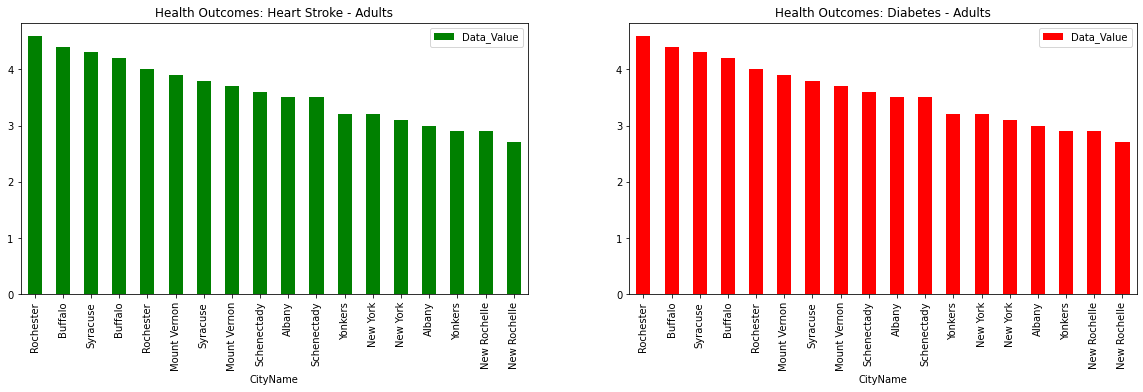

In [0]:
fig1, ax2 = plt.subplots(ncols=2, figsize=(10,5))
data1.plot.bar(title = 'Health Outcomes: Heart Stroke - Adults', x = 'CityName', y = 'Data_Value', figsize=(20,5), color = 'green', ax= ax2[0])
data1.plot.bar(title = 'Health Outcomes: Diabetes - Adults', x = 'CityName', y = 'Data_Value', figsize=(20,5), color = 'red', ax= ax2[1])

##### Exploring the data for California for the year 2016

In [0]:
CA_state = spark.sql("select Year, StateAbbr,StateDesc,GeographicLevel,CityFIPS,CityName,Data_Value,Category,Measure,PopulationCount,MeasureId,CategoryID from Viewone where StateAbbr = 'CA' and Year = '2016'")
CA_state.limit(5).toPandas()

,Year,StateAbbr,StateDesc,GeographicLevel,CityFIPS,CityName,Data_Value,Category,Measure,PopulationCount,MeasureId,CategoryID
0,2016,CA,California,City,640130,Lancaster,10.400000,Health Outcomes,Diagnosed diabetes among adults aged >=18 Years,156633,DIABETES,HLTHOUT
1,2016,CA,California,Census Tract,613588,Citrus Heights,3.400000,Health Outcomes,Stroke among adults aged >=18 Years,3323,STROKE,HLTHOUT
2,2016,CA,California,Census Tract,615044,Compton,34.900002,Unhealthy Behaviors,Obesity among adults aged >=18 Years,452,OBESITY,UNHBEH
3,2016,CA,California,Census Tract,669000,Santa Ana,20.600000,Unhealthy Behaviors,Obesity among adults aged >=18 Years,2018,OBESITY,UNHBEH
4,2016,CA,California,Census Tract,653000,Oakland,19.900000,Unhealthy Behaviors,Obesity among adults aged >=18 Years,3136,OBESITY,UNHBEH


In [0]:
CA_state.createOrReplaceTempView("CAS")

##### Checking the list of cities in California state from which data has been collected

In [0]:
CAS1= spark.sql("select distinct CityName from CAS")
CAS1.limit(10).toPandas()

,CityName
0,Compton
1,Oakland
2,Visalia
3,Lynwood
4,Lancaster
5,Citrus Heights
6,Santa Ana
7,Fresno
8,Mountain View
9,Downey


##### Seeing the cities with adults suffering from Obesity

In [0]:
CAS2= spark.sql("select CityFIPS, CityName,Measure,Data_Value from CAS where Measure = 'Obesity among adults aged >=18 Years' and GeographicLevel = 'City' order by Data_Value desc")
CAS2.limit(10).toPandas()

,CityFIPS,CityName,Measure,Data_Value
0,615044,Compton,Obesity among adults aged >=18 Years,34.799999
1,627000,Fresno,Obesity among adults aged >=18 Years,34.700001
2,682954,Visalia,Obesity among adults aged >=18 Years,33.799999
3,615044,Compton,Obesity among adults aged >=18 Years,33.799999
4,627000,Fresno,Obesity among adults aged >=18 Years,33.700001
5,656700,Perris,Obesity among adults aged >=18 Years,33.599998
6,682954,Visalia,Obesity among adults aged >=18 Years,33.400002
7,665000,San Bernardino,Obesity among adults aged >=18 Years,33.099998
8,644574,Lynwood,Obesity among adults aged >=18 Years,33.099998
9,656700,Perris,Obesity among adults aged >=18 Years,33.000000


##### Here "Data_value" column refers to the generalised numeric value for easy understanding instead of huge numbers

In [0]:
CA_data1 = CAS2.limit(20).toPandas()

##### Seeing the cities with adults suffering from Chronic Kidney disease

In [0]:
CAS3= spark.sql("select CityFIPS, CityName,Measure,Data_Value from CAS where Measure = 'Chronic kidney disease among adults aged >=18 Years' and GeographicLevel = 'City' order by Data_Value desc")
CAS3.limit(10).toPandas()

CA_data2 = CAS3.limit(10).toPandas()
CA_data2

,CityFIPS,CityName,Measure,Data_Value
0,633182,Hemet,Chronic kidney disease among adults aged >=18 Years,4.2
1,665000,San Bernardino,Chronic kidney disease among adults aged >=18 Years,4.1
2,644574,Lynwood,Chronic kidney disease among adults aged >=18 Years,4.0
3,615044,Compton,Chronic kidney disease among adults aged >=18 Years,4.0
4,646898,Merced,Chronic kidney disease among adults aged >=18 Years,3.8
5,673080,South Gate,Chronic kidney disease among adults aged >=18 Years,3.7
6,656700,Perris,Chronic kidney disease among adults aged >=18 Years,3.7
7,682590,Victorville,Chronic kidney disease among adults aged >=18 Years,3.6
8,669196,Santa Maria,Chronic kidney disease among adults aged >=18 Years,3.6
9,669000,Santa Ana,Chronic kidney disease among adults aged >=18 Years,3.6


Out[30]: <AxesSubplot:title={'center':'Health Outcomes: Chronic Kidney disease in Adults'}, xlabel='CityName'>

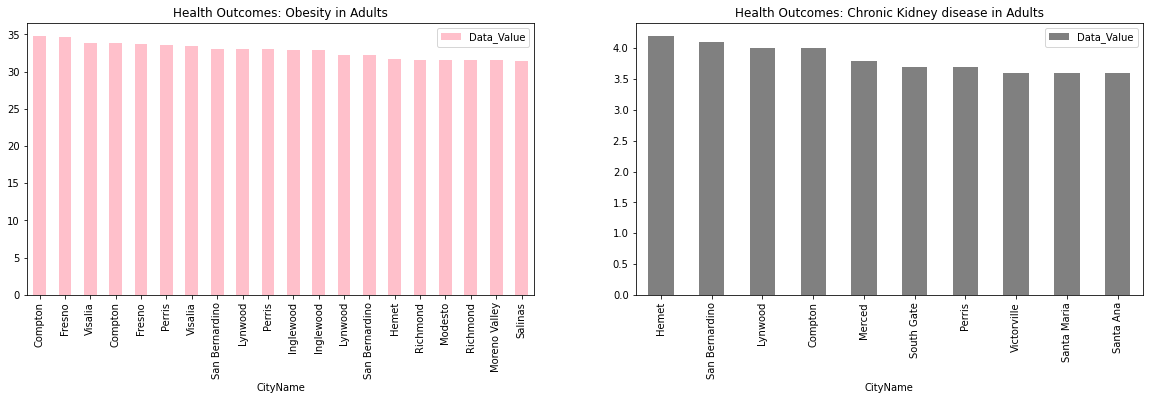

In [0]:
CA_fig, CA_ax = plt.subplots(ncols=2, figsize=(10,5))
CA_data1.plot.bar(title = 'Health Outcomes: Obesity in Adults', x = 'CityName', y = 'Data_Value', figsize=(20,5), color = 'pink', ax= CA_ax[0])
CA_data2.plot.bar(title = 'Health Outcomes: Chronic Kidney disease in Adults', x = 'CityName', y = 'Data_Value', figsize=(20,5), color = 'grey', ax= CA_ax[1])

##### Checking for adults affected by Binge drinking in the cities of California

In [0]:
CAS4 = spark.sql("select CityFIPS, CityName,Measure,Data_Value from CAS where Measure = 'Binge drinking among adults aged >=18 Years' and GeographicLevel = 'City' order by Data_Value desc")
CAS4.limit(20).toPandas()

CA_data3 = CAS4.limit(10).toPandas()
CA_data3

,CityFIPS,CityName,Measure,Data_Value
0,611194,Carlsbad,Binge drinking among adults aged >=18 Years,22.900000
1,624638,Folsom,Binge drinking among adults aged >=18 Years,21.799999
2,641992,Livermore,Binge drinking among adults aged >=18 Years,21.700001
3,667000,San Francisco,Binge drinking among adults aged >=18 Years,21.600000
4,624638,Folsom,Binge drinking among adults aged >=18 Years,21.500000
5,641992,Livermore,Binge drinking among adults aged >=18 Years,21.500000
6,611194,Carlsbad,Binge drinking among adults aged >=18 Years,21.299999
7,667000,San Francisco,Binge drinking among adults aged >=18 Years,21.200001
8,682996,Vista,Binge drinking among adults aged >=18 Years,21.000000
9,678120,Temecula,Binge drinking among adults aged >=18 Years,21.000000


##### Checking for adults affected by Coronary heart disease in the cities of California

In [0]:
CAS5 = spark.sql("select CityFIPS, CityName,Measure,Data_Value from CAS where Measure = 'Coronary heart disease among adults aged >=18 Years' and GeographicLevel = 'City' order by Data_Value desc")
CAS5.limit(20).toPandas()

CA_data4 = CAS5.limit(10).toPandas()
CA_data4

,CityFIPS,CityName,Measure,Data_Value
0,633182,Hemet,Coronary heart disease among adults aged >=18 Years,9.6
1,665000,San Bernardino,Coronary heart disease among adults aged >=18 Years,7.4
2,646842,Menifee,Coronary heart disease among adults aged >=18 Years,7.3
3,602364,Apple Valley,Coronary heart disease among adults aged >=18 Years,7.3
4,646898,Merced,Coronary heart disease among adults aged >=18 Years,7.1
5,659920,Redding,Coronary heart disease among adults aged >=18 Years,7.0
6,656700,Perris,Coronary heart disease among adults aged >=18 Years,6.9
7,633182,Hemet,Coronary heart disease among adults aged >=18 Years,6.9
8,633434,Hesperia,Coronary heart disease among adults aged >=18 Years,6.9
9,644574,Lynwood,Coronary heart disease among adults aged >=18 Years,6.8


Out[33]: <AxesSubplot:title={'center':'Health Outcomes: Coronary Heart disease in Adults'}, xlabel='CityName'>

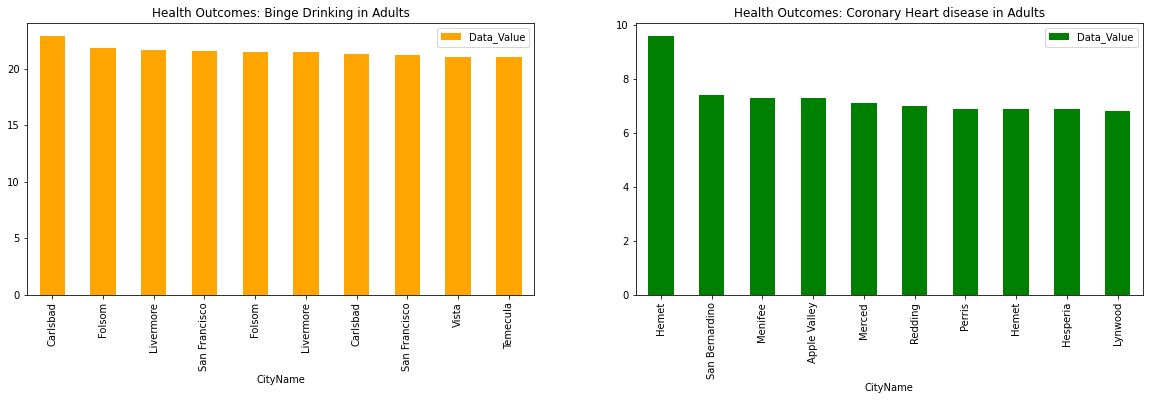

In [0]:
CA_fig, CA_ax = plt.subplots(ncols=2, figsize=(10,5))
CA_data3.plot.bar(title = 'Health Outcomes: Binge Drinking in Adults', x = 'CityName', y = 'Data_Value', figsize=(20,5), color = 'orange', ax= CA_ax[0])
CA_data4.plot.bar(title = 'Health Outcomes: Coronary Heart disease in Adults', x = 'CityName', y = 'Data_Value', figsize=(20,5), color = 'green', ax= CA_ax[1])